# Agent-Based Simulation 

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import random 
import pandas as pd
from matplotlib.collections import LineCollection
import matplotlib as mpl
import numpy as np
from scipy import optimize as opt
from scipy import integrate as intg
from scipy.optimize import least_squares
from scipy.stats import beta
from scipy.stats import bernoulli
from scipy.stats import cumfreq, beta
from utils import simulate_game

%matplotlib inline
plt.style.use('../notebook.mplstyle')

SEED = 1 

## Exogenous Parameters


In [2]:
# Setting exogenous parameters
def reset_exog_params(void=True):
    global Bm, Bw, bm_vals, bw_vals, δ, um, uw, Fm, Fw, λm, λw
    Bm = 10
    Bw = 10
    bm_vals = range(1,Bm+1) 
    bw_vals = range(1,Bw+1)
    
    δ = 0.97
    um = lambda θ : θ 
    uw = lambda θ : θ
    Fm = beta(3,3)
    Fw = beta(3,3)
    λm = 20
    λw = 20
    
    if not void:
        return (Bm, Bw, bm_vals, bw_vals, δ, um, uw, Fm, Fw, λm, λw)

## Swiping Strategies


In [3]:
μ_star = [0.66366994, 0.59515949, 
          0.54890106, 0.51301625, 
          0.4833236, 0.45781311, 
          0.43534878, 0.41521996,
          0.3969497, 0.38020096] 

ω_star = [0.66366994, 0.59515949,
          0.54890106, 0.51301625, 
          0.4833236, 0.45781311, 
          0.43534878, 0.41521996, 
          0.3969497, 0.38020096]

## Single Batch Simulation

In [5]:
exog_params = reset_exog_params(False) 
T = 100
simulation = simulate_game(T, μ_star, ω_star, exog_params)
batch = pd.DataFrame(simulation)
batch.head(5)

,batch,id,time,birth,sex,attractiveness,budget,observed_rate,true_rate,matches,rs_given,rs_received
0,0,0,0,0,Male,0.227965,10,1.0,1.0,0,0,0
1,0,12,0,0,Male,0.927704,9,1.0,1.0,1,1,1
2,0,7,0,0,Male,0.609024,9,1.0,1.0,1,1,1
3,0,15,0,0,Male,0.269747,9,1.0,1.0,0,1,0
4,0,1,0,0,Male,0.242646,9,1.0,1.0,0,1,0


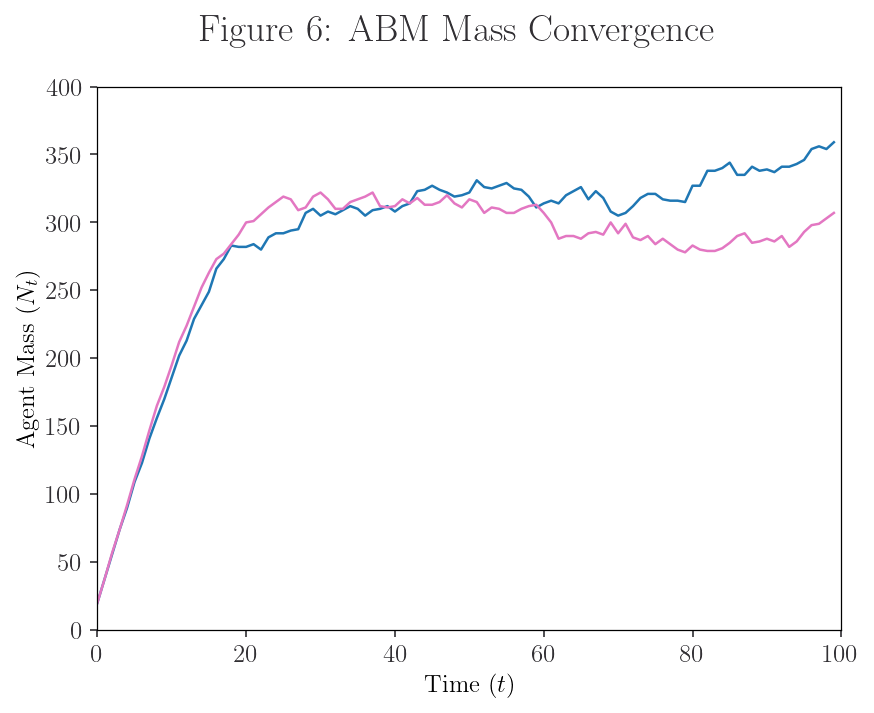

In [9]:
mass_by_sex = batch.groupby(['time', 'sex'], as_index=False).size() 
Nm_series = mass_by_sex[mass_by_sex.sex=='Male']['size']
Nw_series = mass_by_sex[mass_by_sex.sex=='Female']['size']

fig, ax = plt.subplots()
ax.set_xlim(0,T)  
ax.plot(range(0,T), Nm_series, color='tab:blue') 
ax.plot(range(0,T), Nw_series, color='tab:pink') 
ax.set(xlabel=r'Time ($t$)', ylabel=r'Agent Mass ($N_t$)')
fig.suptitle('Figure 6: ABM Mass Convergence ') 
plt.show()


## Multiple Batches Simulation

In [7]:
simulations = []
batches = 10
for i in range(batches):
    game = simulate_game(T, μ_star, ω_star, exog_params, i)
    simulations += game
data = pd.DataFrame(simulations) 

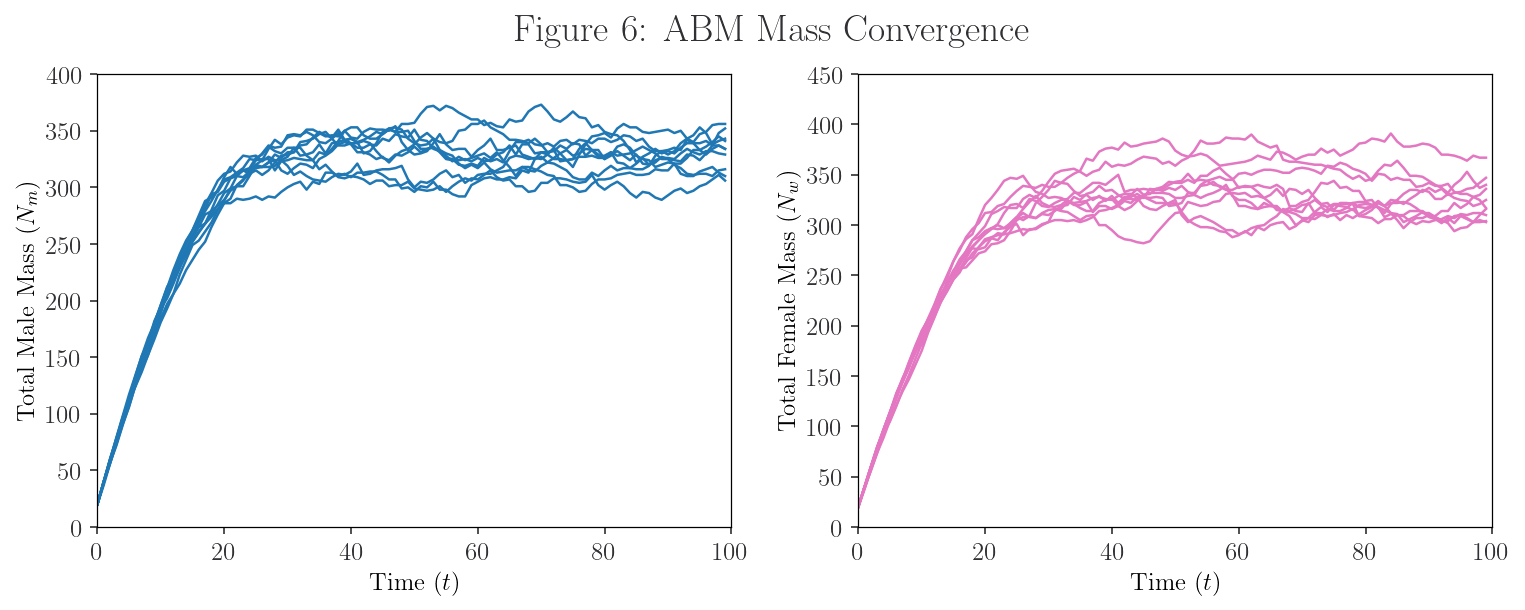

In [10]:
mass = data.groupby(['batch','time','sex'], as_index=False).size()
fig, axs = plt.subplots(1,2, figsize=(12, 4))
axs[0].set_xlim(0,T)  
axs[1].set_xlim(0,T)   

for i in range(batches):
    axs[0].plot(range(0,T), mass[(mass.batch==i)&(mass.sex=='Male')]['size'], color='tab:blue')  

for i in range(batches):
    axs[1].plot(range(0,T), mass[(mass.batch==i)&(mass.sex=='Female')]['size'], color='tab:pink')  

axs[0].set(xlabel=r'Time ($t$)', ylabel=r'Total Male Mass ($N_m$)')
axs[1].set(xlabel=r'Time ($t$)', ylabel=r'Total Female Mass ($N_w$)')
fig.suptitle('Figure 6: ABM Mass Convergence')
plt.savefig('../../figures/abm-mass-conv.png')
plt.show()